In [1]:
import os
import sys
import copy
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from python.model.model import NMFModel
from python.data.datahandler import DataHandler
from python.model.optimization import ComponentSearch
import os
import logging
import time

In [2]:
input_file = os.path.join("D:\\", "projects", "nmf_py", "data", "Dataset-BatonRouge-con.csv")
uncertainty_file = os.path.join("D:\\", "projects", "nmf_py", "data", "Dataset-BatonRouge-unc.csv")
output_path = os.path.join("D:\\", "projects", "nmf_py", "output", "BatonRouge")

In [3]:
seed = 42
quantile = 0.95
drop_min = False
drop_max = True
index_col = "Date"

In [4]:
dh = DataHandler(
        input_path=input_file,
        uncertainty_path=uncertainty_file,
        output_path=output_path,
        index_col=index_col
    )
# dh.remove_outliers(quantile=quantile, drop_min=drop_min, drop_max=drop_max)

28-Feb-23 11:30:12 - Input and output configured successfully


In [5]:
min_component = 1
max_component = 20
max_iterations = 50
epochs = 5
converge_diff = 10
converge_iter = 100

cs = ComponentSearch(seed=seed, datahandler=dh)

In [6]:
cs.search(min_component=min_component, max_component=max_component, max_iterations=max_iterations, epochs=epochs, converge_diff=converge_diff, converge_iter=converge_iter)

28-Feb-23 11:30:12 - -------------------------------- NMF-EPA Model Details -----------------------------------------
28-Feb-23 11:30:12 - Epochs: 5, N Components: 1, Seed: 42
28-Feb-23 11:30:12 - Max Iterations: 50, Feature Count: 41, Sample Count: 307
28-Feb-23 11:30:12 - Learning Rate, Initial: 1.0, Decay Rate: 0.98, Decay Step: 100
28-Feb-23 11:30:12 - Convergence Difference Threshold 10, Convergence Iterations Threshold: 100
28-Feb-23 11:30:12 - Number of GPU's available: 0
28-Feb-23 11:30:12 - ------------------------------------------------------------------------------------------------
Epoch 1 fit: Q = 472734.90625: 100%|███████████████████████████████████████████████████| 50/50 [00:01<00:00, 27.59it/s]
Epoch: 1, Best SUM(Q): 399394.3125, Steps Run: 50, Converged: False, Seed: 8925
Epoch 2 fit: Q = 473940.09375: 100%|███████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.68it/s]
Epoch: 2, Best SUM(Q): 447492.125, Steps Run: 50, Converged: False, Seed: 7739

In [9]:
import pandas as pd
import numpy as np

28-Feb-23 11:33:25 - Loaded backend module://matplotlib_inline.backend_inline version unknown.


<AxesSubplot: xlabel='component'>

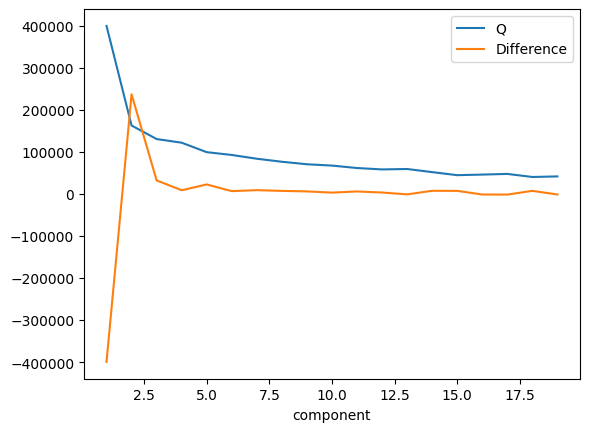

In [13]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

D = []
q_0 = 0
for q in cs.Q:
    D.append(q_0 - q)
    q_0 = q

df = pd.DataFrame(dict(component=range(min_component, max_component), Q=cs.Q, Difference=D))
df.plot(x='component', y=['Q', 'Difference'])

In [ ]:
df